In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('../data/day6.txt') as f:
    user_input = f.read().split('\n')

In [3]:
test_input = '''....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#...'''.split('\n')

### Part 1

In [4]:
def escape_path(row, col, direction, array):
    m = len(array)
    n = len(array[0])

    visited = {(row, col, direction)}

    while True:
        match direction:
            case '^':
                if array[row-1][col] == '#':
                   direction = '>'
                else:
                    row = row - 1
            case '>':
                if array[row][col+1] == '#':
                    direction = 'v'
                else:
                    col = col + 1
            case 'v':
                if array[row+1][col] == '#':
                    direction = '<'
                else:
                    row = row + 1
            case '<':
                if array[row][col-1] == '#':
                    direction = '^'
                else:
                    col = col - 1

        if (row, col, direction) in visited:
            return (False, visited)
        
        visited.add((row, col, direction))

        if direction == '^' and row == 0:
            return (True, visited)
        if direction == '>' and col == n-1:
            return (True, visited)
        if direction == 'v' and row == m-1:
            return (True, visited)
        if direction == '<' and col == 0:
            return (True, visited)
            

In [5]:
def find_start(array):
    for i, row in enumerate(array):
        for j, cell in enumerate(row):
            if cell == '^':
                return (i, j)

In [6]:
def visited_cells(array):
    start_row, start_col = find_start(array)
    start_direction = array[start_row][start_col]

    _ , visited = escape_path(start_row, start_col, start_direction, array)
    unique_visited = set([(row, col) for row, col, _ in visited])

    return unique_visited

In [7]:
len(visited_cells(test_input))

41

In [8]:
len(visited_cells(user_input))

4515

In [9]:
visited_array = np.array([[int(char.replace('.', '0').replace('#', '1').replace('^', '2')) for char in row] for row in user_input])
for row, col in visited_cells(user_input):
    visited_array[row, col] = 2

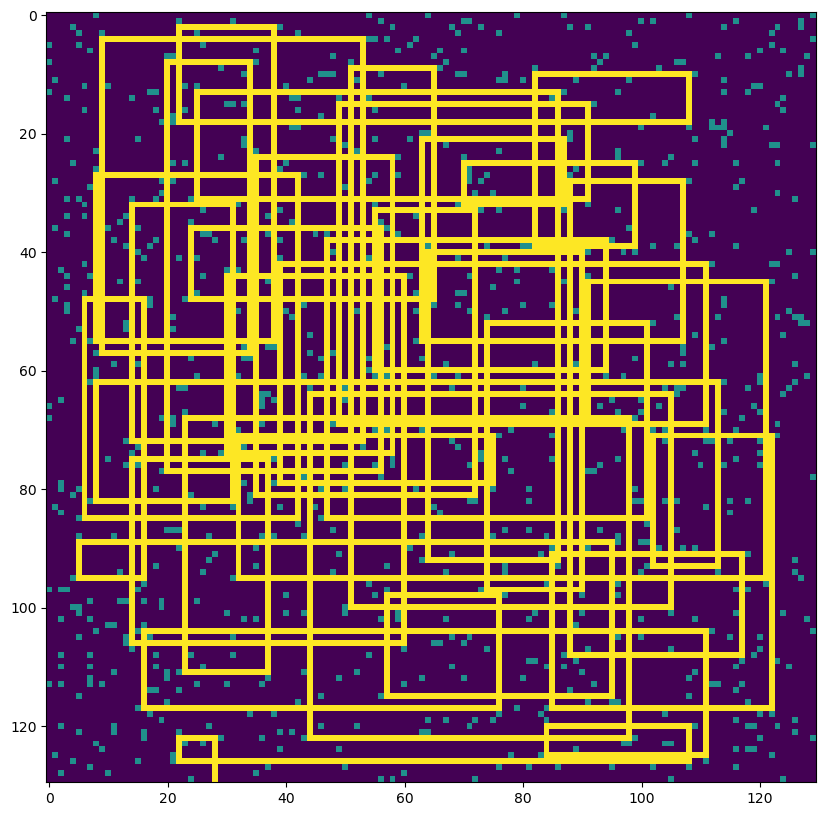

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(visited_array, cmap='viridis')

### Part 2

In [11]:
from tqdm import tqdm

In [17]:
def number_of_cycles(user_input):
    total = 0

    start_row, start_col = find_start(user_input)
    start_direction = user_input[start_row][start_col]

    _, visited_with_dirs = escape_path(start_row, start_col, start_direction, user_input)
    visited = set([(row, col) for row, col, _ in visited_with_dirs])

    for i, j in tqdm(visited):
        if user_input[i][j] in ['^', '>', 'v', '<']:
            continue
        else:
            copy_array = user_input.copy()
            copy_array[i] = copy_array[i][:j] + '#' + copy_array[i][j+1:]
            if not escape_path(start_row, start_col, start_direction, copy_array)[0]:
                total += 1
    return total

In [18]:
number_of_cycles(test_input)

100%|██████████| 41/41 [00:00<00:00, 26206.41it/s]


6

In [19]:
number_of_cycles(user_input)

  0%|          | 0/4515 [00:00<?, ?it/s]

100%|██████████| 4515/4515 [00:10<00:00, 432.03it/s]


1309